In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud

In [31]:
# Load sentiments from file
politics_sentiments = pd.read_csv("politics_sentiment.csv")
education_sentiments = pd.read_csv("education_sentiment.csv")
health_sentiments = pd.read_csv("health_sentiment.csv")
print("Politics:\t", politics_sentiments.shape)
print("Education:\t", education_sentiments.shape)
print("Health:\t", health_sentiments.shape)

Politics:	 (2673, 3)
Education:	 (3577, 3)
Health:	 (4879, 3)


In [32]:
wc_stopwords = wordcloud.STOPWORDS
nltk_stopwords = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
                      'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
                      'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 
                      'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
                      'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 
                      'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 
                      'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
                      'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 
                      'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 
                      'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 
                      'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain',
                      'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', 
                      "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
                      "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
                      'wouldn', "wouldn't"])
pidgin_stopwords = set(['plz', 'abeg', 'pple', 'ppos', 'pple', 'dey', 'wan', 'wey', 'dis', 'dat', 'den', 'wetin', 'u', 'coz', 
                        'wtf', 'sabi', 'abi', 'diz', 'becuz', 'lol', 'lols', 'lolz', 'b4', 'urself', 'joor', 'deh', 'una', 
                        'abt', 'wat', 'tho'])

stop_words = wc_stopwords|nltk_stopwords|pidgin_stopwords
len(stop_words)

256

In [33]:
word_cloud = wordcloud.WordCloud(stopwords=stop_words)
def generate_wordCloud(data, category):
    """
    Generate word cloud for the comments in the given category.
    The bigger the text shows it has a higher frequency.
    """
    print(category+' word cloud:\n')
    text = """ """.join([comment for comment in data['comments']])
    word_cloud.generate(text)
    display(word_cloud.to_image())

Politics word cloud:



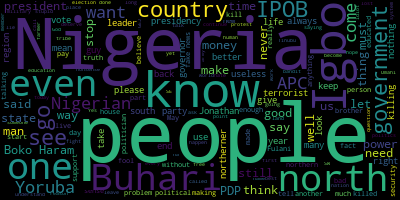

In [6]:
generate_wordCloud(politics_sentiments, 'Politics')

Education word cloud:



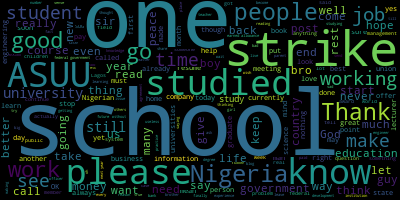

In [7]:
generate_wordCloud(education_sentiments, 'Education')

Health word cloud:



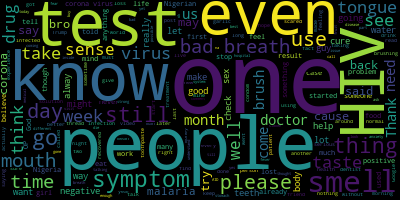

In [8]:
generate_wordCloud(health_sentiments, 'Health')

In [34]:
#merge sentiments
politics_sentiments['category'] = "Politics"
health_sentiments['category'] = "Health"
education_sentiments['category'] = "Education"
all_data = pd.concat([politics_sentiments, health_sentiments, education_sentiments])
all_data['sentiments'] = all_data['sentiments'].map({'pos':1, 'neg':-1, 'neu':0})
display(all_data.head())
print(all_data.shape)

,comments,sentiments,compound,category
0,Any southerner who thinks this insecurity matt...,-1,-0.8500,Politics
1,These people are with us in the south under th...,0,0.0000,Politics
2,May we never be unfortunate o,1,0.3570,Politics
3,When the rabid dog does not find it's usual di...,-1,-0.4767,Politics
4,"Bastards and fools, God go punish the politici...",-1,-0.7650,Politics


(11129, 4)


In [35]:
all_data = all_data[['category', 'sentiments']]
values = ['Politics', 'Health', 'Education']

In [36]:
def plot(data, values, key):
    fig, axs = plt.subplots(1, 3, constrained_layout=True)
    # Create DataFrame containing categories and count of each
    frame = pd.DataFrame(index = np.arange(len(values)), columns=(key,'Positive','Negative', 'Neutral'))
    for i, value in enumerate(values):
        frame.loc[i] = [value, \
                len(data[(data['sentiments'] == 1) & (all_data[key] == value)]), \
                len(data[(data['sentiments'] == 0) & (all_data[key] == value)]), \
                len(data[(data['sentiments'] == -1) & (all_data[key] == value)])
                       ]

    # Set the width of each bar
    bar_width = 0.4

    # Display each category's sentiment rates
    for i in np.arange(len(frame)):
        positive_bar = axs[i].bar(i-bar_width, frame.loc[i]['Positive'], width = bar_width, color = 'g')
        neutral_bar = axs[i].bar(i, frame.loc[i]['Neutral'], width = bar_width, color = 'b')
        negative_bar = axs[i].bar(i+bar_width, frame.loc[i]['Negative'], width = bar_width, color = 'r')
        
        axs[i].set_title(values[i]+' Sentiments Statistics')
        axs[i].set_ylabel('Number of comments')
        

        plt.legend((positive_bar[0], negative_bar[0], neutral_bar[0]),
                   ('Positve_Sentiments', 'Negative_Sentiments', 'Neutral_Sentiments'),
                   framealpha = 0.8)
    fig.set_figwidth(18)
    fig.set_figheight(5)
    plt.savefig("sentiment.pdf")
    plt.show()

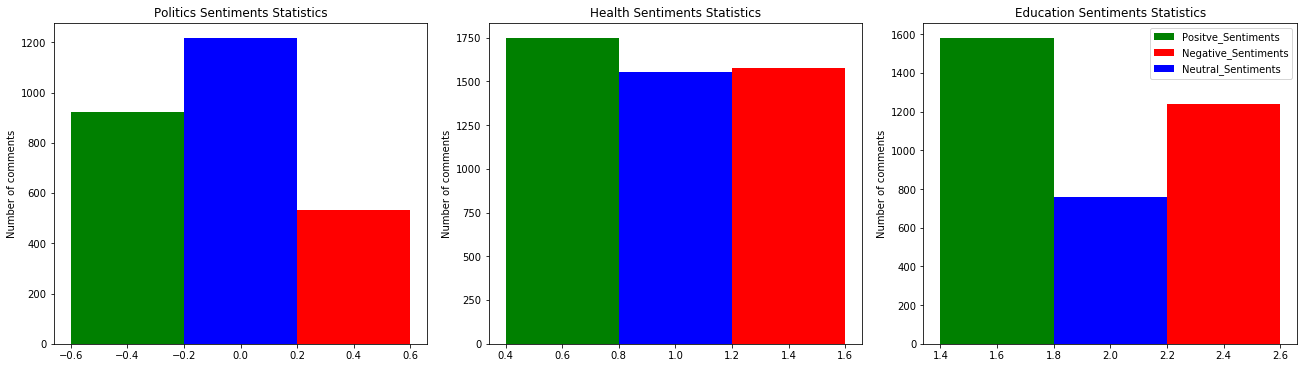

In [12]:
plot(all_data, values, 'category')

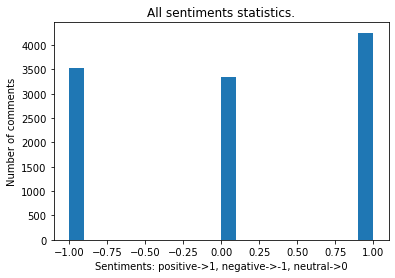

In [13]:
fig = plt.figure()
plt.hist(all_data['sentiments'], 20)
plt.title('All sentiments statistics.')
plt.ylabel("Number of comments")
plt.xlabel("Sentiments: positive->1, negative->-1, neutral->0")
plt.savefig('all_sentiments.pdf')
plt.show()

# Emotion Classifier.

In [37]:
# classify based on emotions using the below thresholds.
"""
-0.75 to -1    -  Angry
-0.5 to  -0.74 -  Frustrated
-0.25 to -0.49 -  Sad
-0.01 to -0.24 -  Dissatisfied/Confused
0 to 0.25      -  Indifferent
0.26 to 0.5    -  Satisfied
0.51 to 0.75   -  Happy
0.76 to 1.0    -  Thrilled
"""
def add_emotions(data):
    emotions = []
    for i in data['compound']:
        j = round(i,2)
        if -1<=j<=-0.75:
            emotions.append('Angry')
        elif -0.74<=j<=-0.5:
            emotions.append('Frustrated')
        elif -0.49<=j<=-0.25:
            emotions.append('Sad')
        elif -0.24<=j<0:
            emotions.append('Unsatisfied')
        elif 0<=j<=0.25:
            emotions.append('Indifferent')
        elif 0.26<=j<=0.5:
            emotions.append('Satisfied')
        elif 0.51<=j<=0.75:
            emotions.append('Happy')
        elif 0.76<=j<=1.0:
            emotions.append('Thrilled')
    data['emotions'] = emotions
    return data

In [38]:
politics_emotion_data = add_emotions(politics_sentiments).drop(['sentiments', 'compound', 'category'], axis=1)
education_emotion_data = add_emotions(education_sentiments).drop(['sentiments', 'compound', 'category'], axis=1)
health_emotion_data = add_emotions(health_sentiments).drop(['sentiments', 'compound', 'category'], axis=1)
print(politics_emotion_data.head())
print(education_emotion_data.head())
print(health_emotion_data.head())

                                            comments     emotions
0  Any southerner who thinks this insecurity matt...        Angry
1  These people are with us in the south under th...  Indifferent
2                      May we never be unfortunate o    Satisfied
3  When the rabid dog does not find it's usual di...          Sad
4  Bastards and fools, God go punish the politici...        Angry
                                            comments     emotions
0                                 Rip beautiful soul        Happy
1                                                Rip  Indifferent
2  Omg! Such a brilliant chap! Would have been a ...     Thrilled
3  No way dear,   Nigeria is not made for saints ...  Indifferent
4                 She was already a MEDICAL DOCTOR.   Indifferent
                                comments     emotions
0                     corona is going...  Indifferent
1  Corona doesn't have place in Nigeria   Indifferent
2                                 On God    Sa

In [43]:
def plot_emotion_stats(data, category):
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes()
    class_name = ['Frustrated', 'Angry', 'Happy', 'Sad', 'Unsatisfied', 'Indifferent', 'Satisfied', 'Thrilled']
    d = {k:len(data[data['emotions']==k]) for k in class_name}
    frame = pd.DataFrame(d, index=range(1))
    for feature in (class_name):
        ax.bar(feature,frame[feature])
    plt.legend(class_name)
    plt.title(category+' emotion classifier')

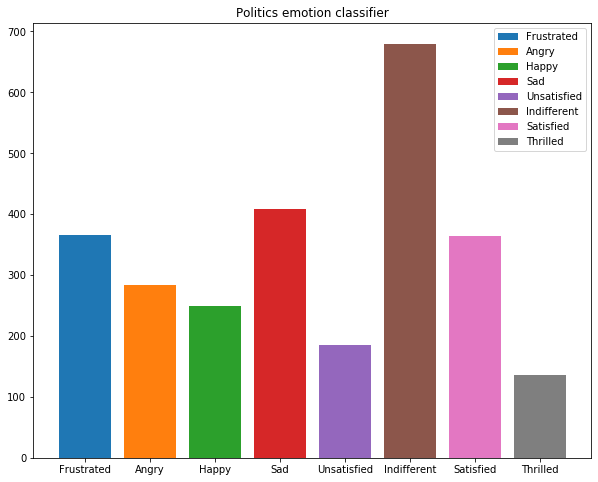

In [44]:
plot_emotion_stats(politics_emotion_data, 'Politics')

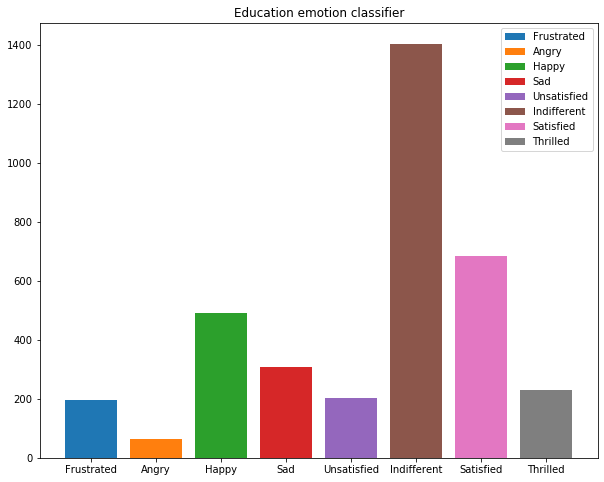

In [45]:
plot_emotion_stats(education_emotion_data, 'Education')

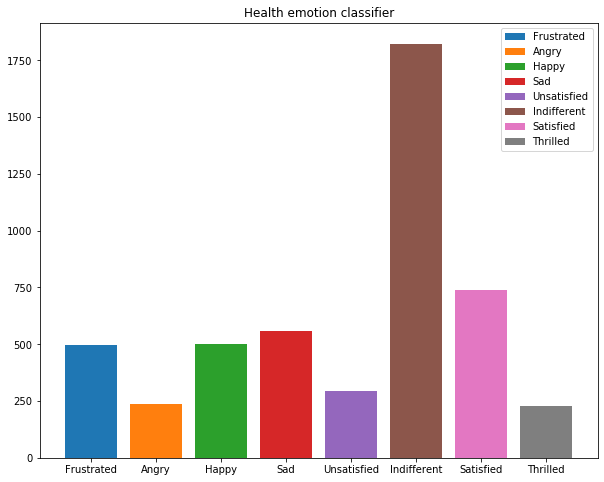

In [46]:
plot_emotion_stats(health_emotion_data, 'Health')

## Model

In [49]:
import pickle
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [50]:
def preprocess_tokenize(sentence):
    """
    Preprocess the data by removing noise.
    Tokenizes and lemmatize preprocessed sentence.
    """
    
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    
    return ' '.join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(sentence.lower()) if w not in stop_words])


In [51]:
def cv_score(model, X, y, scoring, k):
    scores = cross_val_score(model, X, y, scoring=scoring, cv=k)
    avg = sum(scores)/len(scores)
    print("Average cross validation score %0.2f" %(avg*100))

In [52]:
all_emotion_data = pd.concat([politics_emotion_data, education_emotion_data, health_emotion_data], ignore_index=True)
display(all_emotion_data.head())

,comments,emotions
0,Any southerner who thinks this insecurity matt...,Angry
1,These people are with us in the south under th...,Indifferent
2,May we never be unfortunate o,Satisfied
3,When the rabid dog does not find it's usual di...,Sad
4,"Bastards and fools, God go punish the politici...",Angry


In [54]:
y = all_emotion_data['emotions']
X = all_emotion_data['comments'].apply(preprocess_tokenize)

count_vector = CountVectorizer()

training_set = count_vector.fit_transform(X)

model = MultinomialNB()
model.fit(training_set, y)

encoder_model = {'encoder':count_vector, 'model':model}

# check the accuracy of the model
cv_score(model, training_set, y, 'accuracy', 10)

# save encoder and model to file.
with open('encoder_model', 'wb') as f:
    pickle.dump(encoder_model, f)

Average cross validation score 41.06
